#[Assignment 8] Vanilla MLP vs Upsampled MLP 

In this assingment you will work on classification of a glass dataset that is available through Kaggle:

https://www.kaggle.com/datasets/uciml/glass

## Step 0: Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Load Data

Run the following command will download the **glass.csv** to your colab and then load it to a DataFrame

In [2]:
# !gdown 1IijSItKzryxCz_2PWn6g316KEU7rkIfZ
data=pd.read_csv('glass.csv')

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Step 2: Defining the problem 

Using this Dataset, we would like to solve a multi class classification problem:

*   **Type** Column is the label 
*   And the rest of columns are features

Therefore, we would like to train a model which takes the features and predict Type!

## Step 3: Data Encoding

Data Encoding is not needed because all columns are numberical as shown in the result of **data.info()**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## Step 4: Label Analysis

Run the following command to see the values in the label column. As you can see there are **7 classes numbered from 1 to 7**

*   Looking at the histogram you see that the data is **unbalanced** and different classes have diffenre number of records. 
*   **Class 4 does not have any records**; we dont have any record in data that its type is 4. We double check this by running `data[data['Type']==4]` and getting no records.

In [5]:
data['Type']

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

<AxesSubplot: >

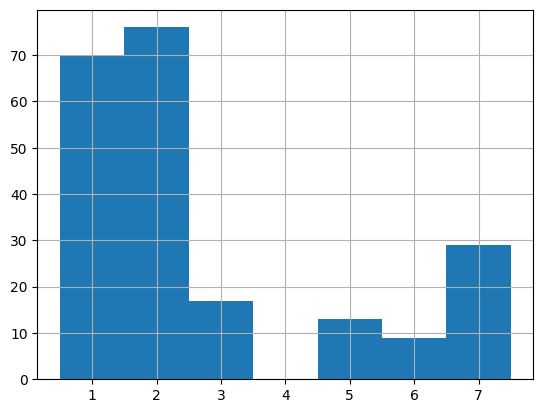

In [6]:
data['Type'].hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])

In [7]:
data[data['Type']==4]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


## Step 5: Normalize Data [0 points]

Use  `StandardScaler` from Scikit-learn and normalize all the features **except** the label.

Your normalized features should be save in a DataFrame called `data_n_df` and all column names should be **presearved**.


In [8]:
from sklearn.preprocessing import StandardScaler
### BEGIN SOLUTION

scaler = StandardScaler()
scaler.fit(data.drop(columns='Type'))
data_scaled = scaler.transform(data.drop(columns='Type'))
data_n_df=pd.DataFrame(data=data_scaled)
data_n_df.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba',	'Fe']
### END SOLUTION

In [9]:
#if you did the normalization correct, the follwoing command should print True
round(data_n_df['RI'].mean())+round(data_n_df['K'].mean())==0

True

## Step 6: Let's review the correlation among features

Just run the block of code! Dont drop any features even if you see high correlation.

/var/folders/4k/t40pq35106x74tksg9mtcwj00000gn/T/ipykernel_67363/2739963929.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot: >

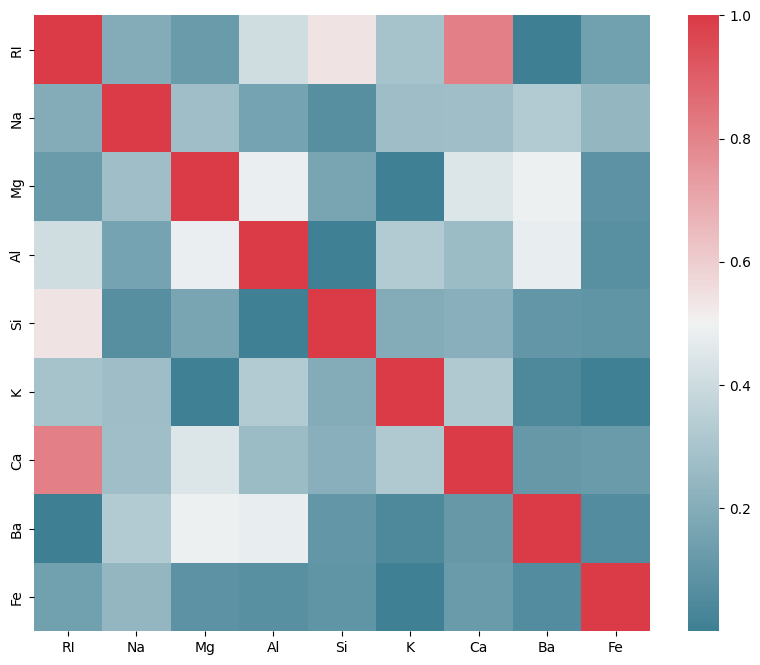

In [10]:
import seaborn as sns
corr=abs(data_n_df.corr())


f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Step 7: Data Split [0 points]

Use  `train_test_split` from Scikit-learn and split the Features and Label(Y) to **70%** training subset and **30%** test subset. Use the variable names as shown below. 

<font color=red>You **must** use `random_state=10` to get the result needed.</font>

In [11]:
from sklearn.model_selection import train_test_split
### BEGIN SOLUTION



X_train, X_test, Y_train, Y_test = train_test_split(data_n_df, data['Type'], random_state=10, train_size=0.7)

### END SOLUTION

<AxesSubplot: >

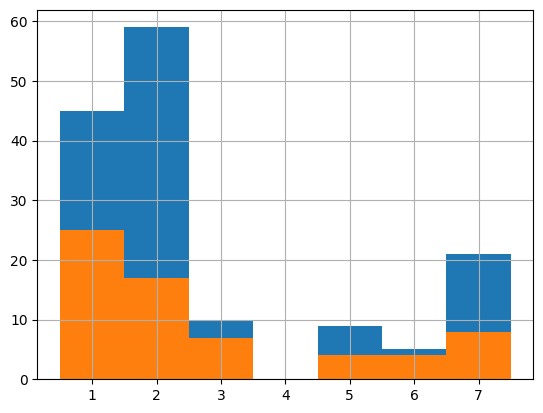

In [12]:
#Review the following histograms and see how data is split.
Y_train.hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])
Y_test.hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])

## Step 8: MLP Grid search [5 points]

Running the following command should give you a confusion matrix of the best logistic regression model!

###8.1 Form your dictionary of parameters

Go to the help of MLP in the following link:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

And form your param_cases using these arguments:

*   'hidden_layer_sizes'
*   'activation'
*   'solver'
*   'learning_rate'
*   'max_iter'

Do **not** use other parameters.

In [13]:
### BEGIN SOLUTION


param_cases={
    'hidden_layer_sizes':[(30,), (30,10)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'adam'],
    'learning_rate' : ['constant', 'adaptive'],
    'max_iter' : [10000]
}

### END SOLUTION

###8.2 Training all models

Complete the code below so it runs all the combinations of parameters from param_cases.

<font color=red>Change the param_cases, run the following block and evaluate the result till you get accuracy of %80+ </font> 

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
### BEGIN SOLUTION

MLP_G = MLPClassifier()
MLP_Grid = GridSearchCV(MLP_G, param_grid=param_cases, verbose=1)
MLP_Best = MLP_Grid.fit(X_train, Y_train)


### END SOLUTION

Fitting 5 folds for each of 24 candidates, totalling 120 fits


###8.3 Evaluate the result

Run the following command to see the result in **descending** order.


In [15]:
pd.concat([pd.DataFrame(MLP_Best.cv_results_["params"]),pd.DataFrame(MLP_Best.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values(by=['Accuracy'], ascending=False)

,activation,hidden_layer_sizes,learning_rate,max_iter,solver,Accuracy
23,relu,"(30, 10)",adaptive,10000,adam,0.805747
15,tanh,"(30, 10)",adaptive,10000,adam,0.799310
21,relu,"(30, 10)",constant,10000,adam,0.799080
1,logistic,"(30,)",constant,10000,adam,0.799080
17,relu,"(30,)",constant,10000,adam,0.798851
7,logistic,"(30, 10)",adaptive,10000,adam,0.792184
0,logistic,"(30,)",constant,10000,lbfgs,0.792184
3,logistic,"(30,)",adaptive,10000,adam,0.791954
13,tanh,"(30, 10)",constant,10000,adam,0.785517
5,logistic,"(30, 10)",constant,10000,adam,0.785287


###8.4 Confusion Matrix

Run the following command to see the confusion matrix of your best model


/Users/jbchang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


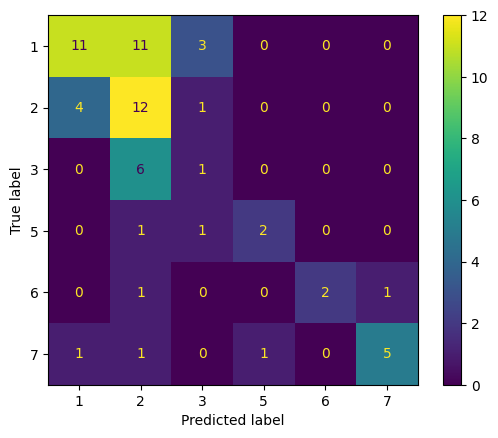

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(MLP_Best.best_estimator_,X_test,Y_test)

###8.5 Classification Report

Run the following command to see the f1-score and accuracy on test data

In [17]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, MLP_Best.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           1       0.69      0.44      0.54        25
           2       0.38      0.71      0.49        17
           3       0.17      0.14      0.15         7
           5       0.67      0.50      0.57         4
           6       1.00      0.50      0.67         4
           7       0.83      0.62      0.71         8

    accuracy                           0.51        65
   macro avg       0.62      0.49      0.52        65
weighted avg       0.59      0.51      0.52        65



<font color=red>As you can see in the classification report, the f1-score is pretty low. Why?? because data is imbalanced and we have not accomodated for this issue. Look at confusion Matrix (8.4) one more time and it should be clear to you.</font>

## Step 9: MLP Grid search + Upsampling [5 points]

The classification report is not impressive? why? because data is **imbalanced** 

In this step we will deal with Imbalanced data using upsampling!

###9.1: Form a DataFrame 

All normalized features + Label (data['Type'])

<AxesSubplot: >

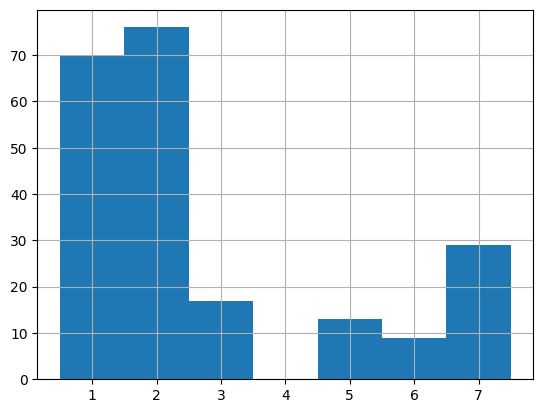

In [18]:
#run this block of code to see the distribution of labels one more time!
data['Type'].hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])

<font color=red>Class 1 and 2 are acceptable but classes 3,5,6 and 7 have small number of records - they need to be upsampled</font>

In [19]:
#run this block to get features and label all in one DataFrame
data_n_df_all=pd.concat([data_n_df, data['Type']],axis=1)

In [20]:
#let's look at the DataFrame
data_n_df_all.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1


###9.2: Re-sampling

The idea here is to repeat the records that belong to classes 3,5,6 and 7 to have more records for these classes. So we re-sample; we add repeated records to the original dataset to make classes balanced.

We are going to use resample from Scikit learn:

https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

In [21]:
from sklearn.utils import resample
#In the following line, we create a new dataframe by including only type=1 and type=2 because these two classes already have enough records and do not need to upsample (look at the histogram in 9.1)
data_n_df_upsampled=data_n_df_all[(data['Type']==1) | (data['Type']==2)].copy()

Write a code in the following block that upsample Type 3,5,6 and 7 so that each of them have 70 records. And then append them all to the `data_n_df_upsampled`


In [22]:
### BEGIN SOLUTION
labels=[3,5,6,7]
for label in labels:
    y=data_n_df_all[data['Type']==label]
    re_y = resample(y, n_samples=70,replace=True, stratify=y, random_state=0)
    data_n_df_upsampled=pd.concat([data_n_df_upsampled, re_y], axis=0)
    
### END SOLUTION

<AxesSubplot: >

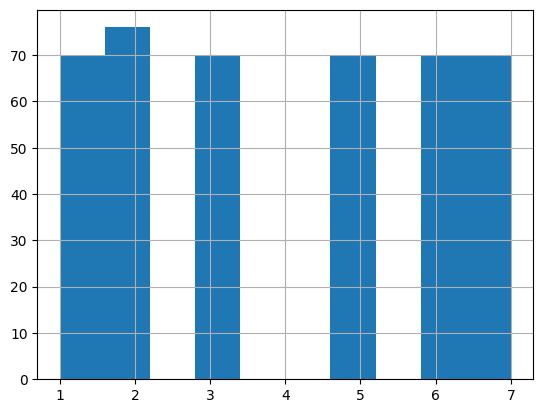

In [23]:
#if you done the upsampling correct, then running the following command should show the data that has 70 records for all classes. Type 2 has just a ccouple of more records.
data_n_df_upsampled['Type'].hist()

###9.3: Split

Use  `train_test_split` from Scikit-learn and split the balanced dataframe to **70%** training subset and **30%** test subset. Use the variable names as shown below. 

<font color=red>You **must** use `random_state=10` to get the result needed.</font>

In [24]:
from sklearn.model_selection import train_test_split
### BEGIN SOLUTION


X_train_U, X_test_U, Y_train_U, Y_test_U = train_test_split(data_n_df_upsampled.drop(columns='Type'), data_n_df_upsampled['Type'], random_state=10, train_size=0.7)

### END SOLUTION

###9.4 Training all models

Complete the code below so it runs all the combinations of parameters from `param_cases`

Do **not** re-define param_cases. Use the one you already had in previous sections.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
### BEGIN SOLUTION

MLP_G_U =  MLPClassifier()
MLP_Grid_U = GridSearchCV(MLP_G, param_grid=param_cases)
MLP_Best_U = MLP_Grid.fit(X_train_U, Y_train_U)

### END SOLUTION

Fitting 5 folds for each of 24 candidates, totalling 120 fits


###9.5 Evaluate the result

Run the following command to see the result in **descending** order.


In [26]:
pd.concat([pd.DataFrame(MLP_Best_U.cv_results_["params"]),pd.DataFrame(MLP_Best_U.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values(by=['Accuracy'], ascending=False)

,activation,hidden_layer_sizes,learning_rate,max_iter,solver,Accuracy
2,logistic,"(30,)",adaptive,10000,lbfgs,0.882655
23,relu,"(30, 10)",adaptive,10000,adam,0.879209
19,relu,"(30,)",adaptive,10000,adam,0.879209
15,tanh,"(30, 10)",adaptive,10000,adam,0.875989
21,relu,"(30, 10)",constant,10000,adam,0.875989
5,logistic,"(30, 10)",constant,10000,adam,0.872768
4,logistic,"(30, 10)",constant,10000,lbfgs,0.872260
7,logistic,"(30, 10)",adaptive,10000,adam,0.869435
20,relu,"(30, 10)",constant,10000,lbfgs,0.869266
17,relu,"(30,)",constant,10000,adam,0.869209


###9.6 Confusion Matrix

Run the following command to see the confusion matrix of your best model


/Users/jbchang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


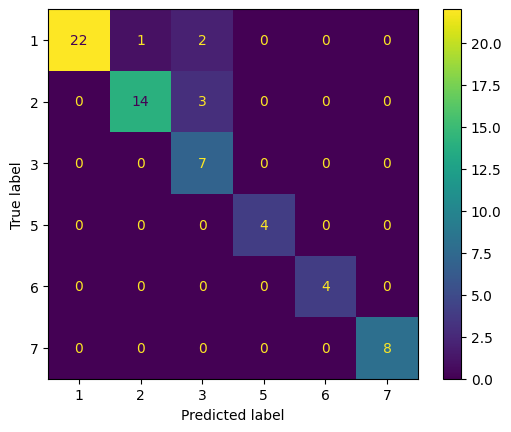

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(MLP_Best_U.best_estimator_,X_test,Y_test)

##Step 10 Evaluate on the original Test Data!

Now we use the best model that was trained on the upsampled data to predict the result for the original test data that we created in Step 7.

We are doing this step 
1.  to compare our result to the original MLP with no upsampling 
2. and also compare it with Logistic Regression that we had before

Run the following command to see the f1-score and accuracy on test data

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, MLP_Best_U.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.88      0.94        25
           2       0.93      0.82      0.87        17
           3       0.58      1.00      0.74         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         8

    accuracy                           0.91        65
   macro avg       0.92      0.95      0.92        65
weighted avg       0.94      0.91      0.91        65



**<font color=red>You made it - Impressive result?!</font>**